In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import japanize_matplotlib
from pathlib import Path

# 現在のノートブックからの相対パスを絶対パスに変換
notebook_dir = Path(os.path.abspath('')).parent
data_path = notebook_dir / 'data' / 'processed' / 'wt262avs.adicht_rec2.parquet'

# データの読み込み
df = pd.read_parquet(data_path)

# データの先頭を表示
print("DataFrameの先頭5行:")
display(df.head())

# データの基本情報を表示
print("\nDataFrameの基本情報:")
display(df.info())

DataFrameの先頭5行:


,PFC,PPC,A1,V1,Stimulus,Time_s,PFC_filtered,PPC_filtered,A1_filtered,V1_filtered,Event_ID,Stimulus_Type
0,63.68750,-48.06250,-76.906250,-55.328125,-0.000312,0.000,-9.687126,-29.744644,-29.668319,-31.102712,0,No_Stimulus
1,42.40625,-50.87500,-80.546875,-57.750000,-0.000312,0.001,-16.177164,-31.208505,-31.960842,-31.552850,0,No_Stimulus
2,31.43750,-70.71875,-99.937500,-82.546875,-0.000312,0.002,-22.393838,-32.559073,-34.101970,-31.901094,0,No_Stimulus
3,30.37500,-44.06250,-70.140625,-49.937500,-0.000312,0.003,-28.047092,-33.677845,-35.946312,-32.045870,0,No_Stimulus
4,-4.53125,-58.40625,-88.937500,-58.468750,0.000000,0.004,-32.896286,-34.466580,-37.366260,-31.903339,0,No_Stimulus



DataFrameの基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240450 entries, 0 to 4240449
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PFC            float32
 1   PPC            float32
 2   A1             float32
 3   V1             float32
 4   Stimulus       float32
 5   Time_s         float64
 6   PFC_filtered   float64
 7   PPC_filtered   float64
 8   A1_filtered    float64
 9   V1_filtered    float64
 10  Event_ID       int64  
 11  Stimulus_Type  object 
dtypes: float32(5), float64(5), int64(1), object(1)
memory usage: 307.3+ MB


None

刺激タイプごとの回数:


Stimulus_Type
Light          299975
Sound          299876
Light+Sound    299544
Name: count, dtype: int64

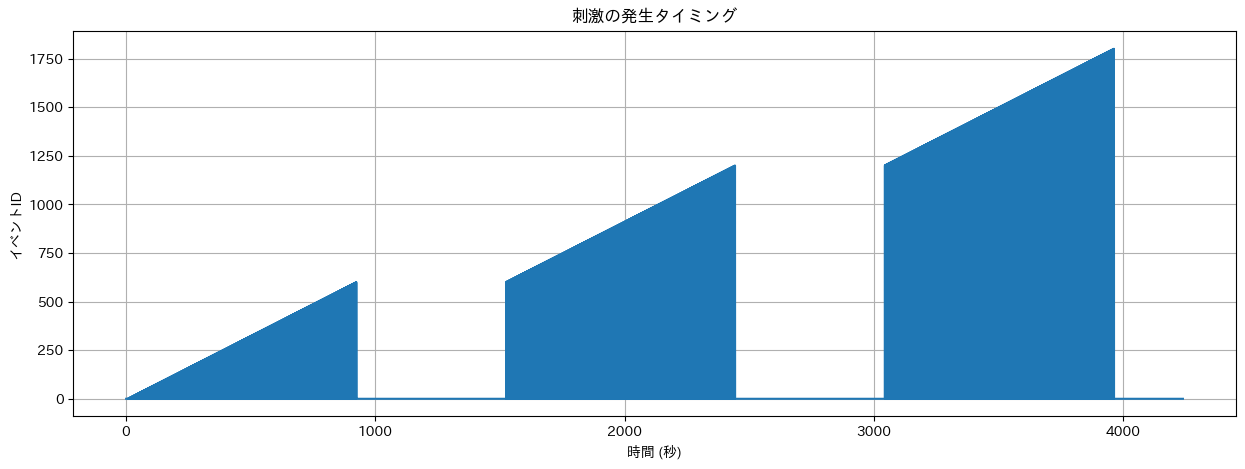

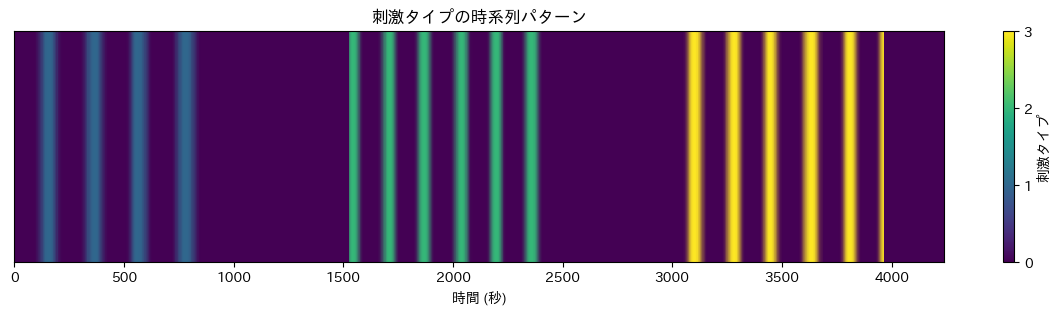

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため


# 刺激タイプごとの回数を集計
stimulus_counts = df[df['Stimulus_Type'] != 'No_Stimulus']['Stimulus_Type'].value_counts()
print("刺激タイプごとの回数:")
display(stimulus_counts)

# --- 修正箇所②: 2つ目のグラフを修正 ---
# 刺激の発生タイミングを可視化
plt.figure(figsize=(15, 5))
# X軸にdf.indexの代わりに、計算した時間(秒)を指定
plt.plot(df['Time_s'], df['Event_ID']) 
plt.title('刺激の発生タイミング')
# X軸のラベルを「秒」に変更
plt.xlabel('時間 (秒)') 
plt.ylabel('イベントID')
plt.grid(True)
plt.show()

# --- 修正箇所③: 3つ目のグラフ（ヒートマップ）を修正 ---
# 刺激タイプごとの発生タイミングをヒートマップで表示
stimulus_type_map = {'Light': 1, 'Sound': 2, 'Light+Sound': 3, 'No_Stimulus': 0}
df['Stimulus_Type_Numeric'] = df['Stimulus_Type'].map(stimulus_type_map)

plt.figure(figsize=(15, 3))
# imshowのextentパラメータでX軸の範囲を秒単位で指定
# [X軸の開始, X軸の終了, Y軸の開始, Y軸の終了]
plt.imshow([df['Stimulus_Type_Numeric']], aspect='auto', cmap='viridis', 
           extent=[df['Time_s'].iloc[0], df['Time_s'].iloc[-1], 0, 1])
plt.title('刺激タイプの時系列パターン')
# X軸のラベルを「秒」に変更
plt.xlabel('時間 (秒)')
plt.colorbar(ticks=[0, 1, 2, 3], label='刺激タイプ')
plt.yticks([])
plt.show()

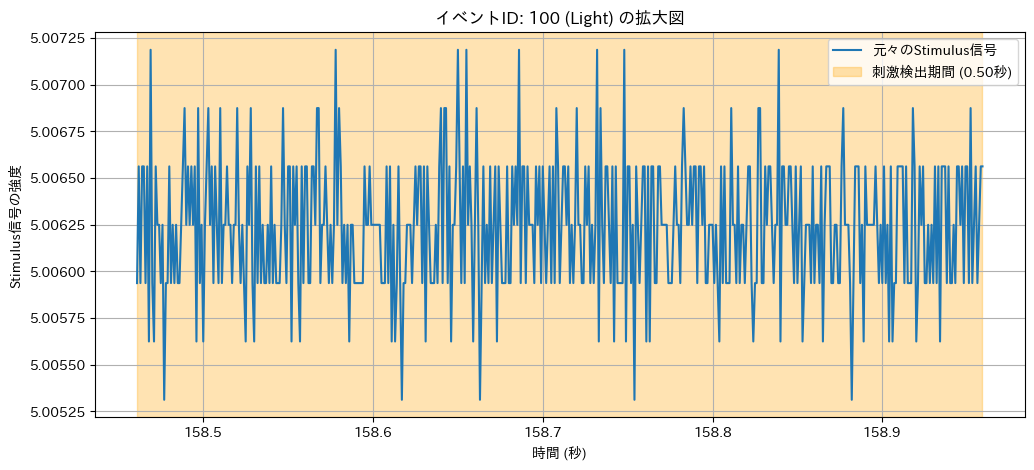

In [23]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# --- 確認したいイベントIDを指定 ---
target_event_id = 100 # 例えば100番目のイベントを見てみる

# 対象イベントの期間だけデータを抽出
event_df = df[df['Event_ID'] == target_event_id]

# イベントの開始時刻と終了時刻を取得
start_time = event_df['Time_s'].iloc[0]
end_time = event_df['Time_s'].iloc[-1]
stim_type = event_df['Stimulus_Type'].iloc[0]

# グラフ描画
plt.figure(figsize=(12, 5))
plt.plot(event_df['Time_s'], event_df['Stimulus'], label='元々のStimulus信号')
plt.title(f'イベントID: {target_event_id} ({stim_type}) の拡大図')
plt.xlabel('時間 (秒)')
plt.ylabel('Stimulus信号の強度')
plt.axvspan(start_time, end_time, color='orange', alpha=0.3, label=f'刺激検出期間 ({end_time - start_time:.2f}秒)')
plt.legend()
plt.grid(True)
plt.show()

インポートに成功しました！🎉

イベントID 1 の波形:


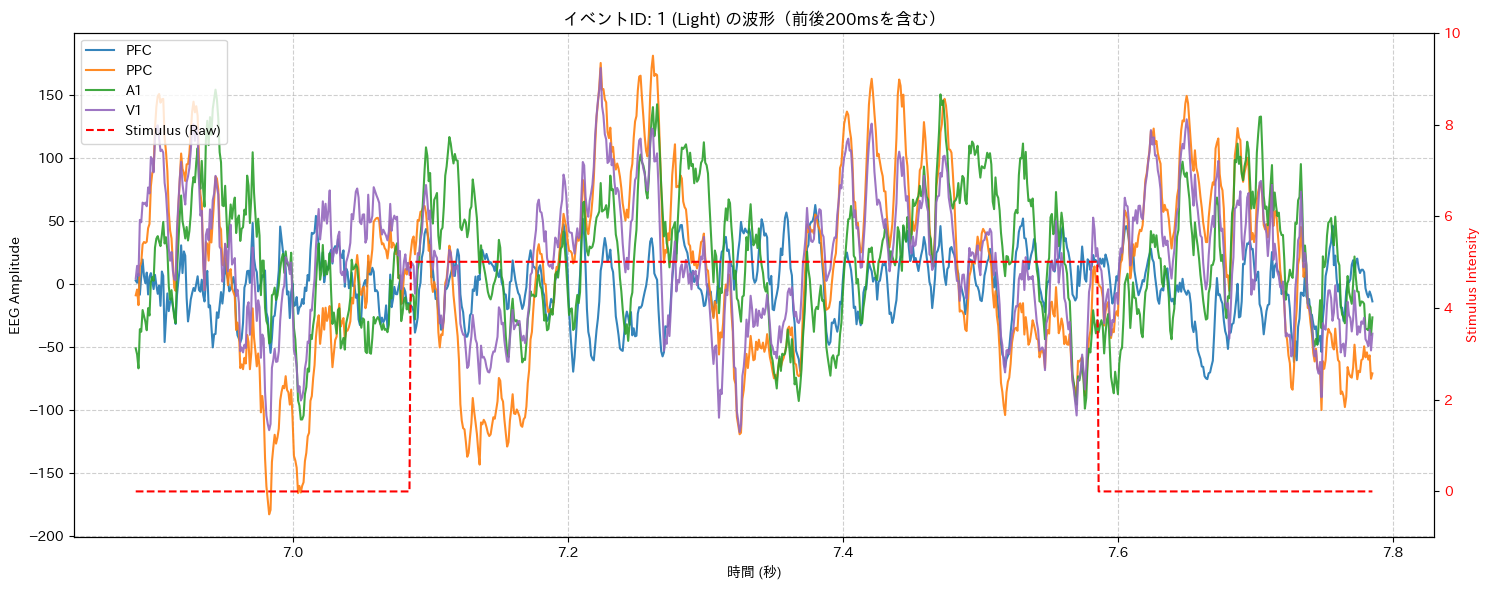


イベントID 601 の波形:


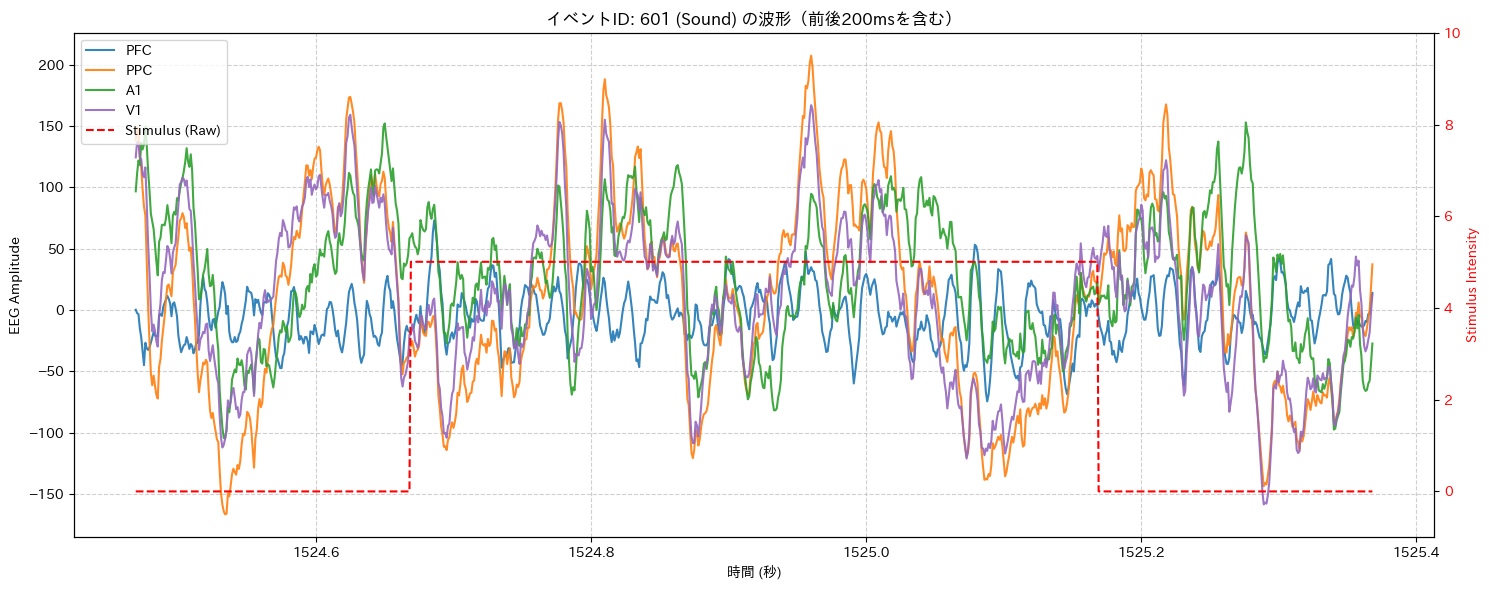


イベントID 1201 の波形:


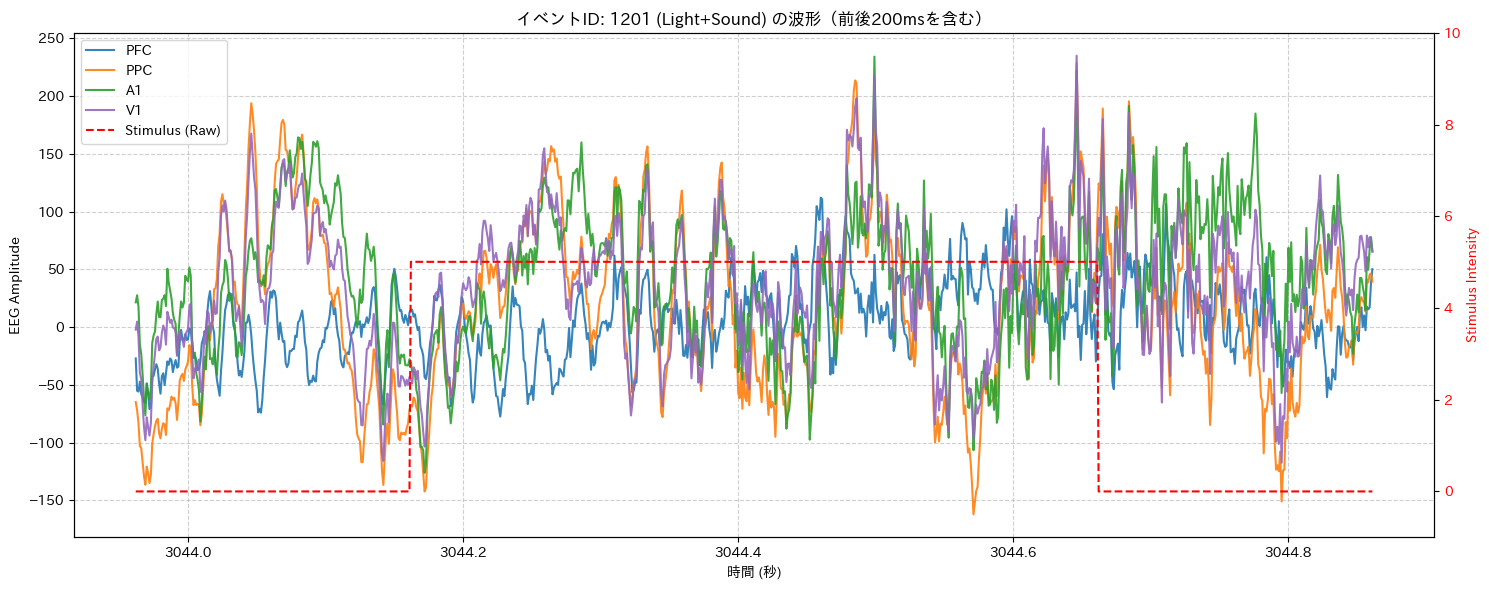

In [4]:
import sys
import os

# 'notebooks'ディレクトリから2つ上の階層（プロジェクトルート）のパスを取得
# このコードはどの環境でもプロジェクトルートを指すようにしてくれるので便利
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Pythonのモジュール検索パスリストにプロジェクトルートを追加
if project_root not in sys.path:
    sys.path.append(project_root)

# これでsrcからのインポートがうまくいくはず
from src.visualization import plot_event_waveform

# テスト
print("インポートに成功しました！🎉")
# srcフォルダのvisualization.pyから関数をインポート
from src.visualization import plot_event_waveform

# 1回目、601回目、1201回目...
target_events = [1, 601, 1201]
for event_id in target_events:
    print(f"\nイベントID {event_id} の波形:")
    plot_event_waveform(df, event_id, padding_ms=200) # 関数の呼び出し部分はそのまま

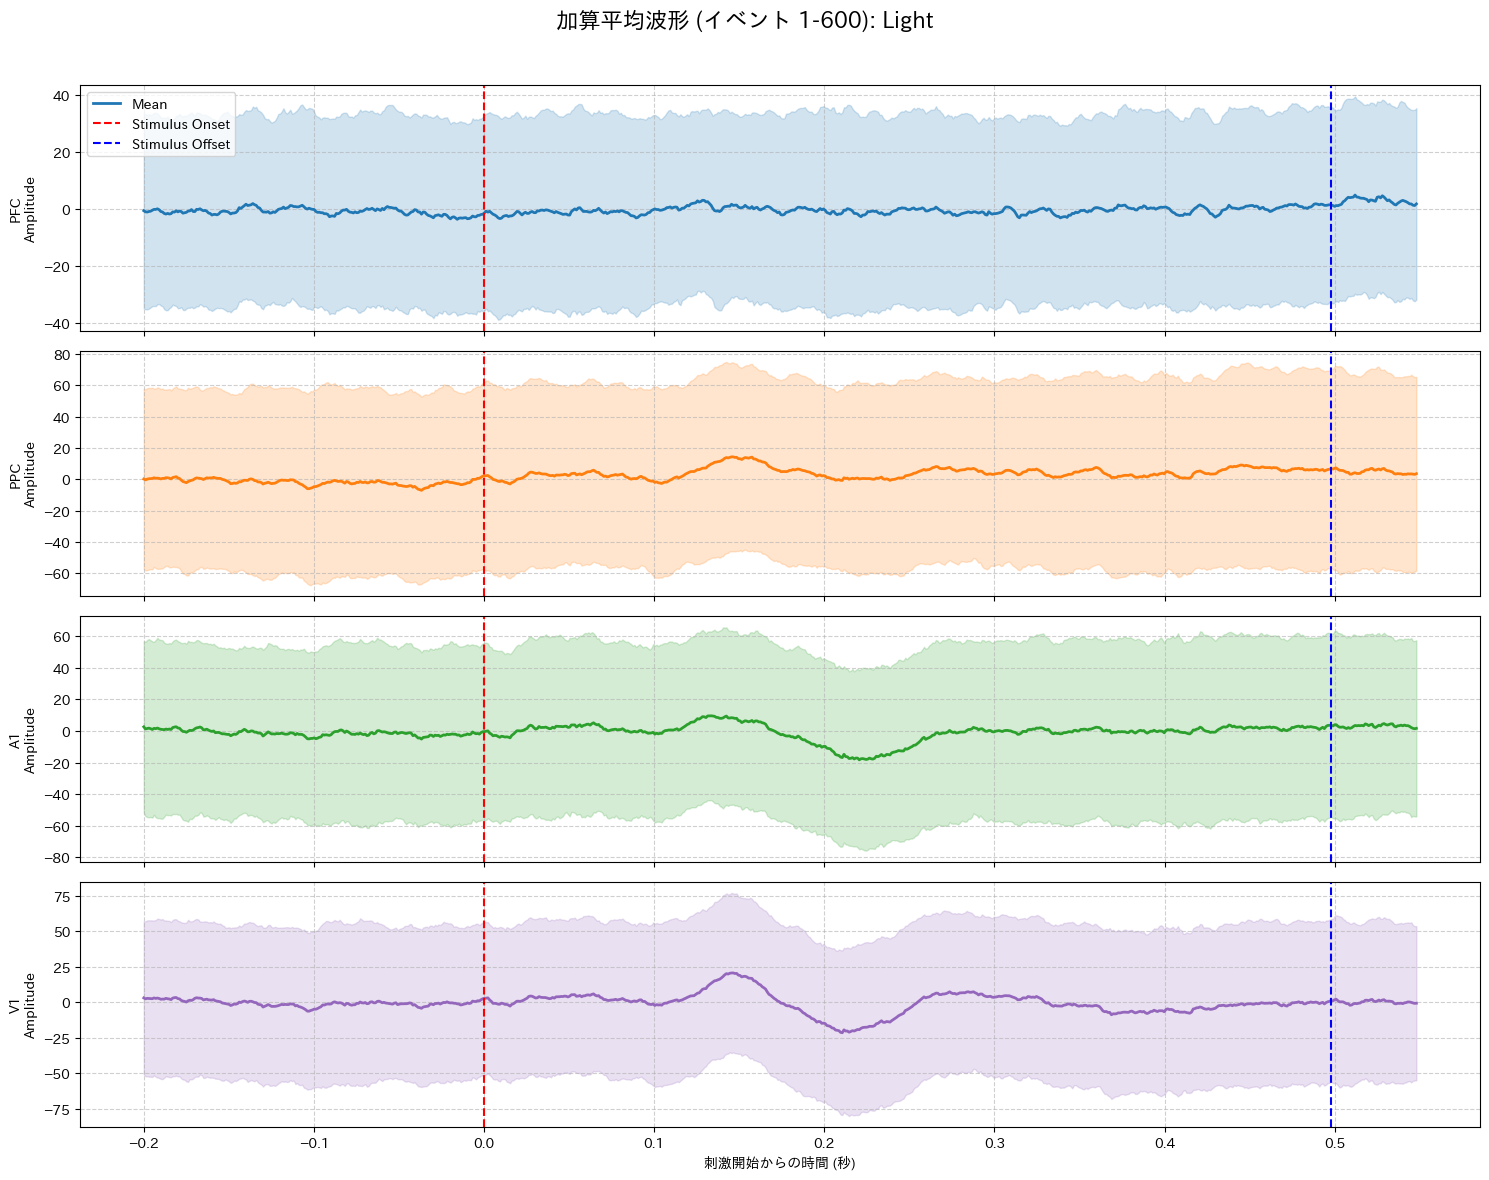

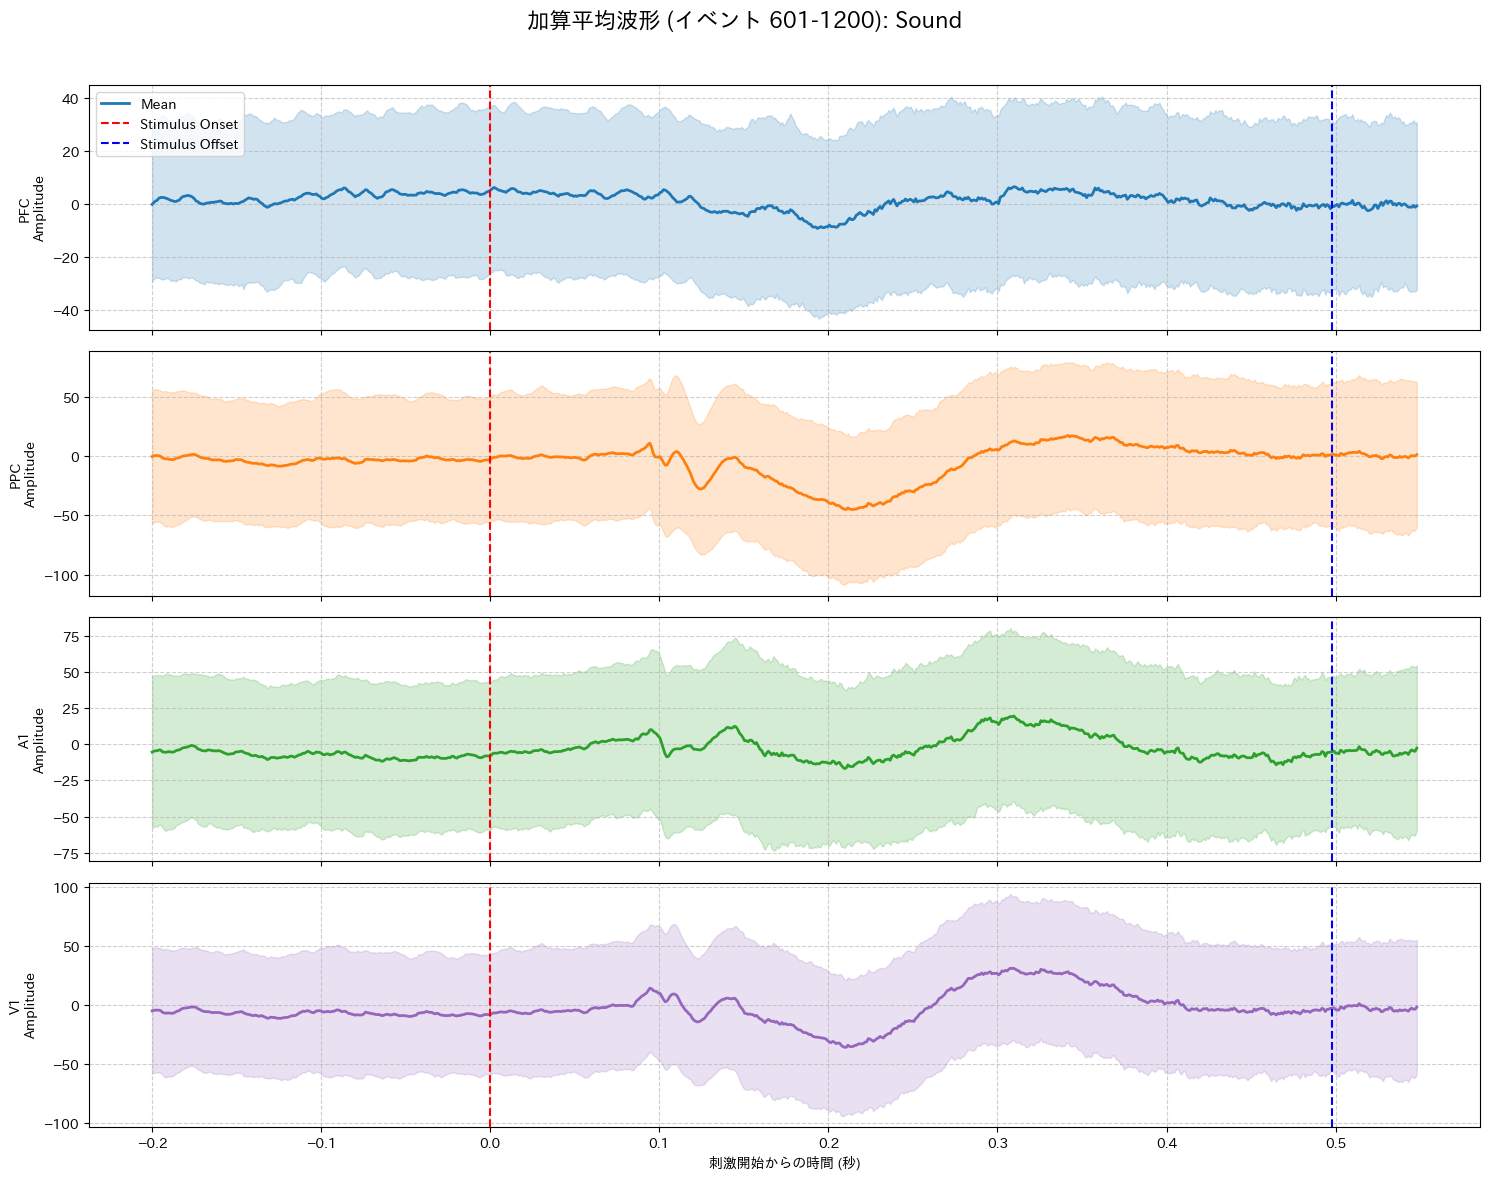

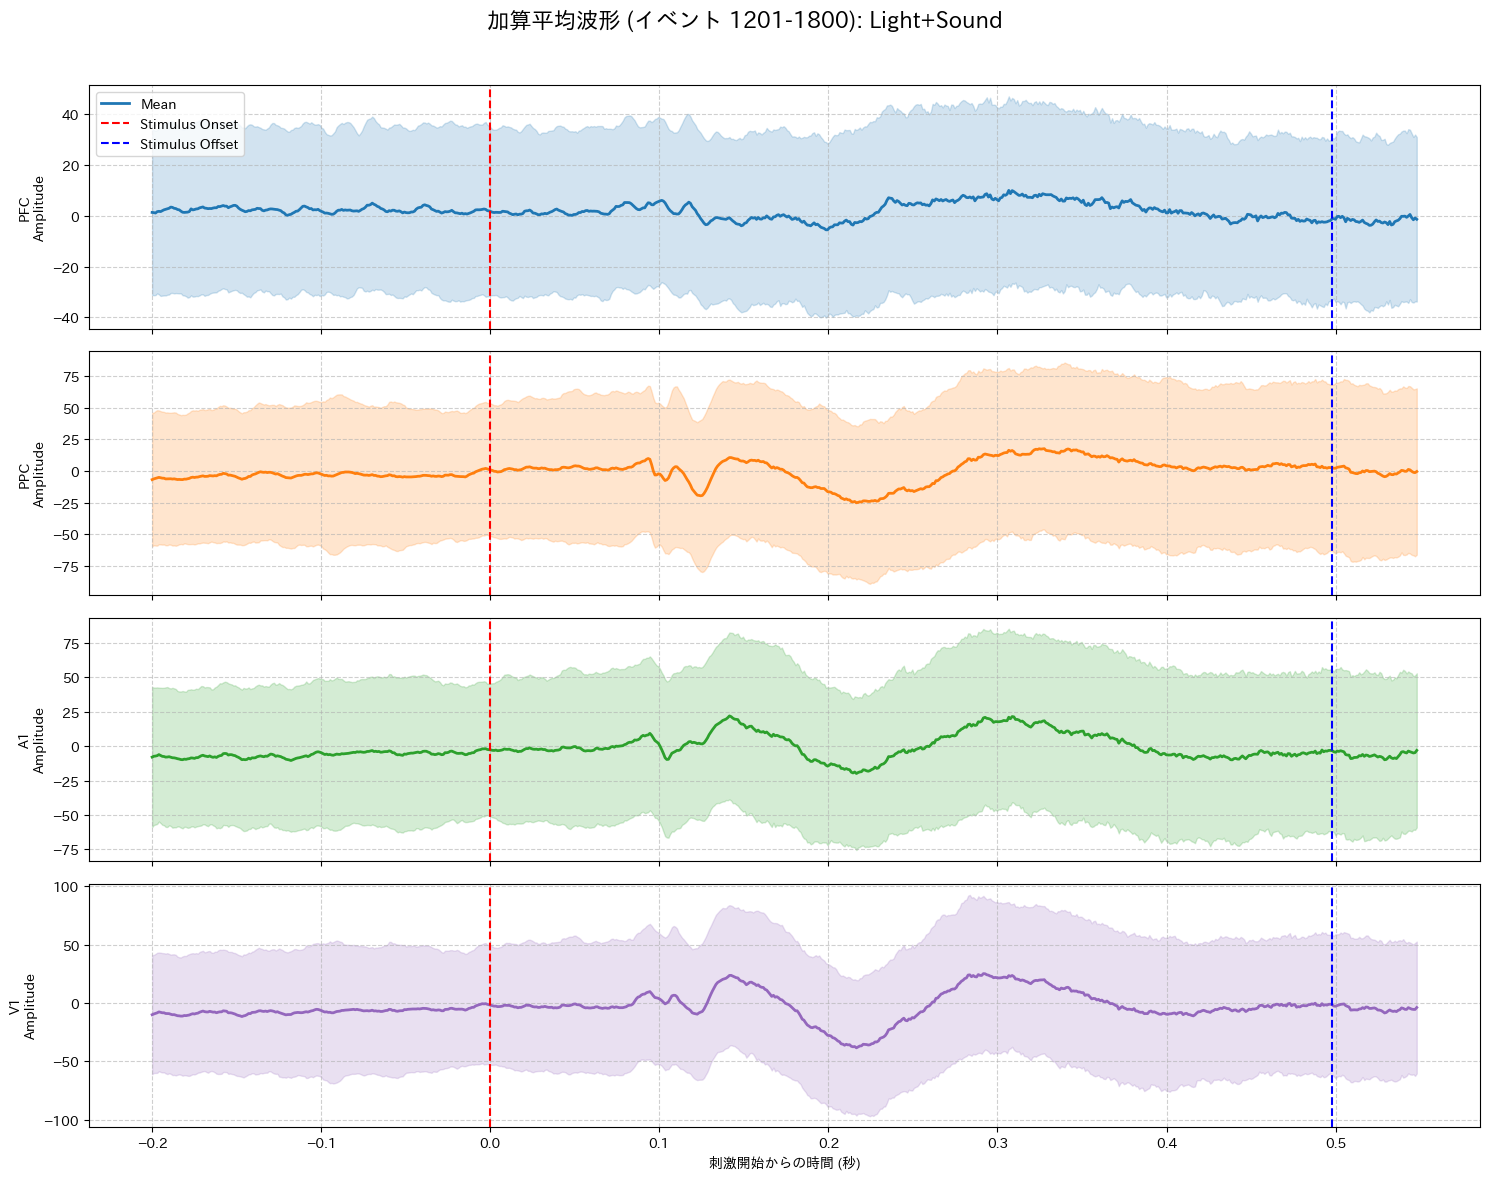

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語表示のため

def plot_erp_with_dynamic_window(df, start_id, end_id, pre_stim_ms=200, post_offset_ms=50, title=""):
    """
    加算平均波形をプロットする。表示範囲は刺激終了後、指定時間まで動的に調整される。
    
    Args:
        df (pd.DataFrame): データフレーム
        start_id (int): 開始イベントID
        end_id (int): 終了イベントID
        pre_stim_ms (int): 刺激前の描画期間 (ms)
        post_offset_ms (int): 刺激 "終了後" の描画期間 (ms)
        title (str): グラフ全体のタイトル
    """
    eeg_channels = ['PFC', 'PPC', 'A1', 'V1']
    
    # --- ステップ1: まず平均刺激持続時間を計算 ---
    stim_durations_ms = []
    valid_event_ids = []
    for event_id in range(start_id, end_id + 1):
        event_indices = df.index[df['Event_ID'] == event_id]
        if not event_indices.empty:
            duration_ms = event_indices[-1] - event_indices[0]
            stim_durations_ms.append(duration_ms)
            valid_event_ids.append(event_id)

    if not stim_durations_ms:
        print(f"イベントID {start_id}-{end_id} の有効なデータが見つかりませんでした。")
        return
        
    avg_duration_ms = int(np.mean(stim_durations_ms))
    
    # --- ステップ2: 描画範囲を決定 ---
    # 刺激後、トータルで何ms表示するかを計算
    plot_post_ms = avg_duration_ms + post_offset_ms

    # --- ステップ3: エポック化（データ切り出し） ---
    epochs_dict = {ch: [] for ch in eeg_channels}
    for event_id in valid_event_ids:
        stim_onset_idx = df.index[df['Event_ID'] == event_id][0]
        
        start_cut_idx = stim_onset_idx - pre_stim_ms
        end_cut_idx = stim_onset_idx + plot_post_ms
        
        if start_cut_idx < 0 or end_cut_idx >= len(df):
            continue
            
        for channel in eeg_channels:
            epoch = df[channel].iloc[start_cut_idx:end_cut_idx].values
            # 稀に長さが1ずれることがあるため、長さを揃える
            if len(epoch) == pre_stim_ms + plot_post_ms:
                epochs_dict[channel].append(epoch)

    # --- ステップ4: グラフ描画 ---
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 12), sharex=True)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']
    
    # X軸の時間軸を作成 (秒単位)
    time_axis = np.linspace(-pre_stim_ms / 1000, plot_post_ms / 1000, pre_stim_ms + plot_post_ms)
    avg_duration_s = avg_duration_ms / 1000.0

    for i, channel in enumerate(eeg_channels):
        ax = axes[i]
        
        if not epochs_dict[channel]: # もし有効なエポックがなければスキップ
            ax.text(0.5, 0.5, 'No valid data', ha='center', va='center')
            continue
            
        epochs_matrix = np.array(epochs_dict[channel])
        mean_waveform = np.mean(epochs_matrix, axis=0)
        std_waveform = np.std(epochs_matrix, axis=0)
        
        ax.plot(time_axis, mean_waveform, label='Mean', color=colors[i], linewidth=2)
        ax.fill_between(time_axis, mean_waveform - std_waveform, mean_waveform + std_waveform, color=colors[i], alpha=0.2)
        
        ax.axvline(x=0, color='red', linestyle='--', linewidth=1.5, label='Stimulus Onset')
        ax.axvline(x=avg_duration_s, color='blue', linestyle='--', linewidth=1.5, label='Stimulus Offset')
        
        ax.set_ylabel(f'{channel}\nAmplitude')
        ax.grid(True, linestyle='--', alpha=0.6)
        
        if i == 0:
            ax.legend(loc='upper left')

    axes[-1].set_xlabel('刺激開始からの時間 (秒)')
    fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# ===============================================================
# == 使い方 (ご自身のデータフレーム 'df' を使って実行してください) ==
# ===============================================================

# 以下は実行例です。
# post_offset_ms=50 とすることで、刺激終了後 0.05秒 (50ms) まで描画されます。

# 1. Light刺激 (イベントID 1-600)
plot_erp_with_dynamic_window(df, 
                             start_id=1, 
                             end_id=600, 
                             post_offset_ms=50,
                             title="加算平均波形 (イベント 1-600): Light")

# 2. Sound刺激 (イベントID 601-1200)
plot_erp_with_dynamic_window(df, 
                             start_id=601, 
                             end_id=1200, 
                             post_offset_ms=50,
                             title="加算平均波形 (イベント 601-1200): Sound")

# 3. Light+Sound刺激 (イベントID 1201-1800)
plot_erp_with_dynamic_window(df, 
                             start_id=1201, 
                             end_id=1800, 
                             post_offset_ms=50,
                             title="加算平均波形 (イベント 1201-1800): Light+Sound")


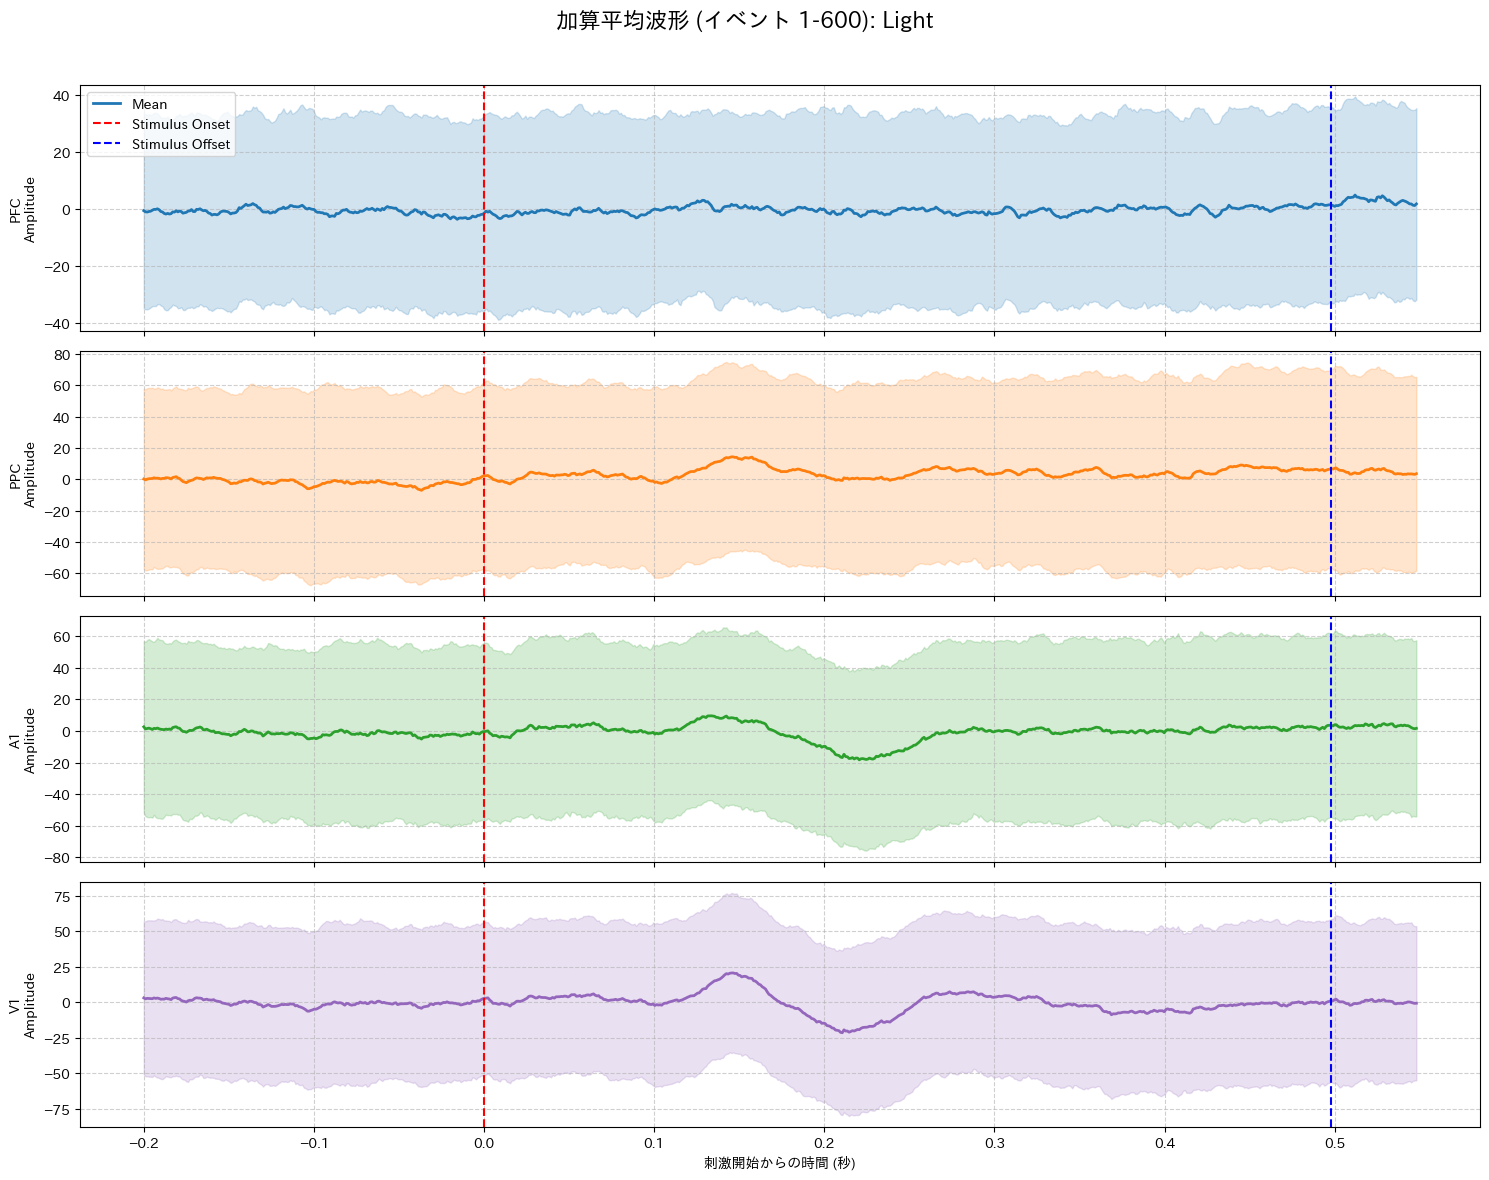

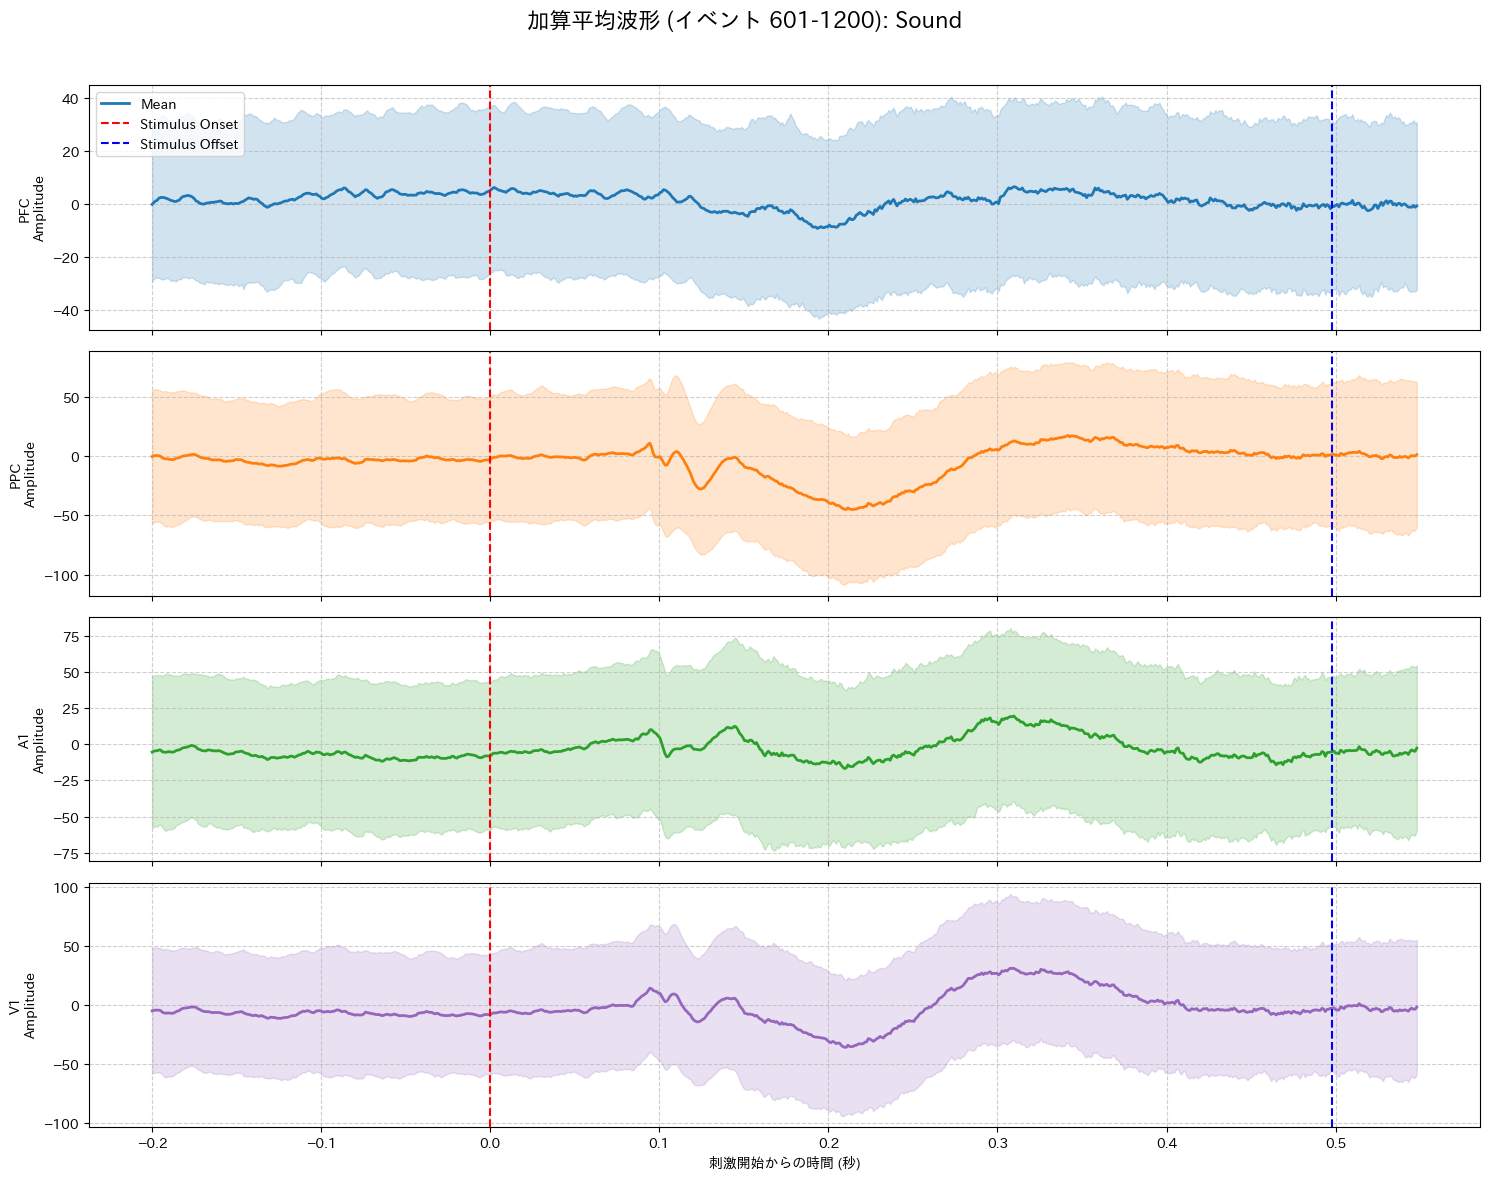

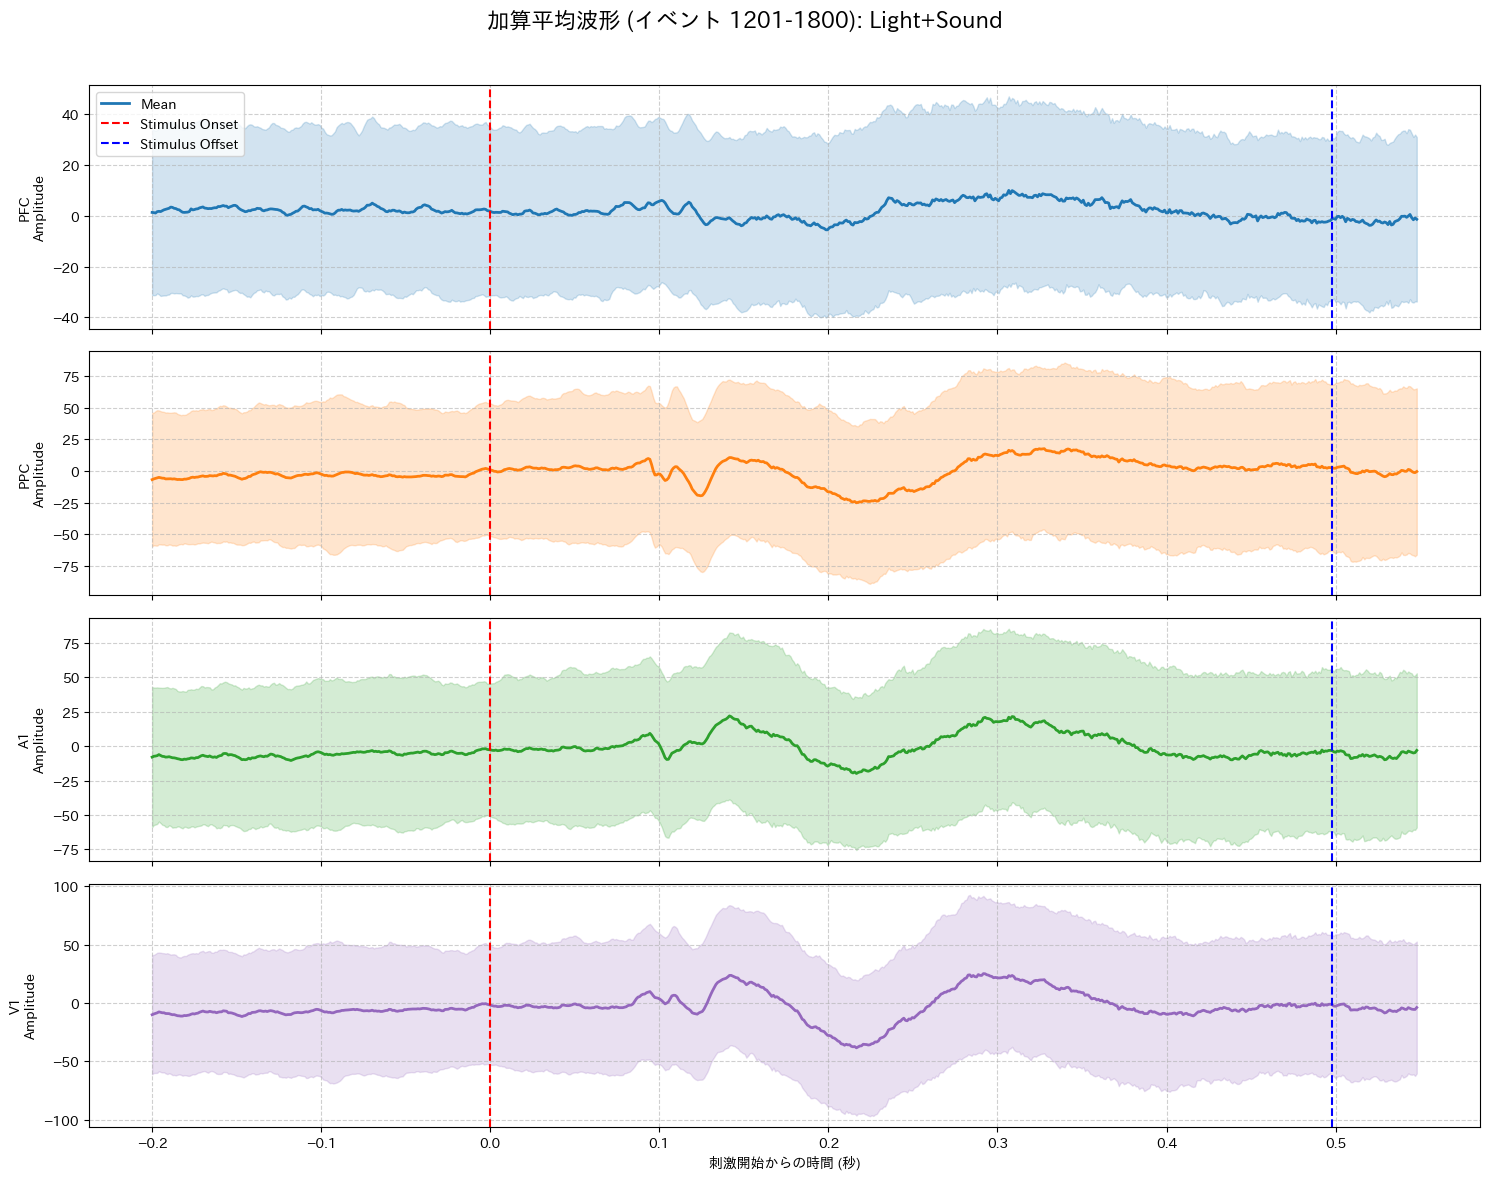

In [3]:
import pandas as pd
import sys
import os

# --- パスの設定 ---
# このNotebook（01_eda.ipynb）から見て、
# 親ディレクトリ（project_root）をPythonの検索パスに追加します。
# これにより、srcフォルダの中のモジュールをインポートできるようになります。
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# --- 作成したモジュールから関数をインポート ---
from src.plot_utils import plot_erp_with_dynamic_window

# --- データの読み込み ---
# df = pd.read_csv(...) # ここでご自身のデータフレーム'df'を準備してください

# ===============================================================
# == これで、Notebook上から関数を直接呼び出せます ==
# ===============================================================

# 1. Light刺激 (イベントID 1-600)
plot_erp_with_dynamic_window(df, 
                             start_id=1, 
                             end_id=600, 
                             post_offset_ms=50,
                             title="加算平均波形 (イベント 1-600): Light")

# 2. Sound刺激 (イベントID 601-1200)
plot_erp_with_dynamic_window(df, 
                             start_id=601, 
                             end_id=1200, 
                             post_offset_ms=50,
                             title="加算平均波形 (イベント 601-1200): Sound")

# 3. Light+Sound刺激 (イベントID 1201-1800)
plot_erp_with_dynamic_window(df, 
                             start_id=1201, 
                             end_id=1800, 
                             post_offset_ms=50,
                             title="加算平均波形 (イベント 1201-1800): Light+Sound")

In [2]:
# Stimulus_TypeごとのEvent_IDのユニークな数を計算
unique_event_counts = df.groupby('Stimulus_Type')['Event_ID'].nunique()

# 結果を表示
print("Stimulus_TypeごとのEvent_IDのユニークな数:")
display(unique_event_counts)

Stimulus_TypeごとのEvent_IDのユニークな数:


Stimulus_Type
Light          600
Light+Sound    600
No_Stimulus      2
Sound          600
Name: Event_ID, dtype: int64